___
<img style="float: left; margin: 30px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/db/Logo_ITESO_normal.jpg" width="200" height="300" /> 


# SEGUNDO EXAMEN PARCIAL
# SIMULACIÓN DE PROCESOS FINANCIEROS

## Examen Tema 2
## Nombre: Juan Pablo Dominguez 

## Fecha: 9 de abril del 2024

## Por: Oscar David Jaramillo Z.

# 1.
Usando la información reportada en el archivo `Datos_b.csv`, responda las siguientes preguntas:

a) **Para la columna 1 de su archivo `Datos_b.csv`**, utilice el método de kernel density estimation de su preferencia para ajustar un distribución de probabilidad a este conjunto de datos. Posteriormente, utilizar el método de aceptación y rechazo para generar 10000 muestras aleatorias de la distribución ajustada y en una misma figura graficar el histograma de los valores aleatorios obtenidos con el método de aceptación y rechazo y la distribución de probabilidad obtenido con el kernel density estimation, algo similar a la siguiente figura.

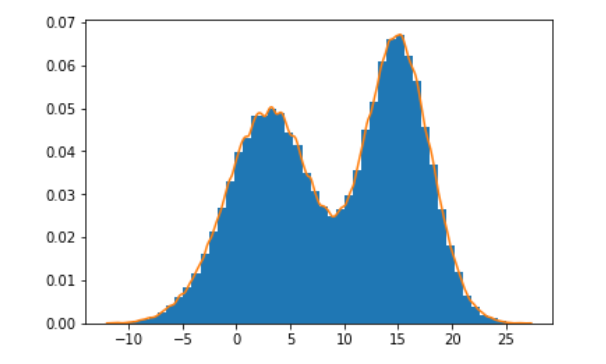

In [1]:
from JSAnimation.IPython_display import anim_to_html
import seaborn as sns
from scipy.integrate import quad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from __future__ import division
%pylab inline
import math
from scipy import optimize
import scipy.stats as stats

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


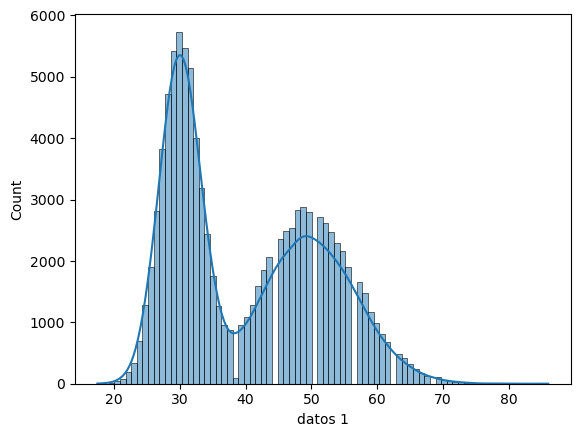

In [2]:

# Paso 1: Calcular KDE
data = pd.read_csv('Datos_b.csv')
columna_1 = data['datos 1']
grades = np.array(columna_1)
kde = gaussian_kde(grades)

# Visualización de la distribución y KDE
sns.histplot(columna_1, kde=True)


def cdf(x):
    return quad(lambda t: kde.evaluate(t), -np.inf, x)[0]


In [3]:
# Ejemplo de cómo obtener la CDF para un valor específico
valor = 39
porcion_distribucion_acumulada = cdf(valor)
print("La porción de distribución acumulada para el valor {} es: {}".format(valor, porcion_distribucion_acumulada))


# Obtencion de limites 

media = columna_1.mean()
minimo = columna_1.min()
maximo= columna_1.max()

print(media)
print(minimo)
print(maximo)

La porción de distribución acumulada para el valor 39 es: 0.5278521157097925
39.99950435008571
17.446270335279127
86.0


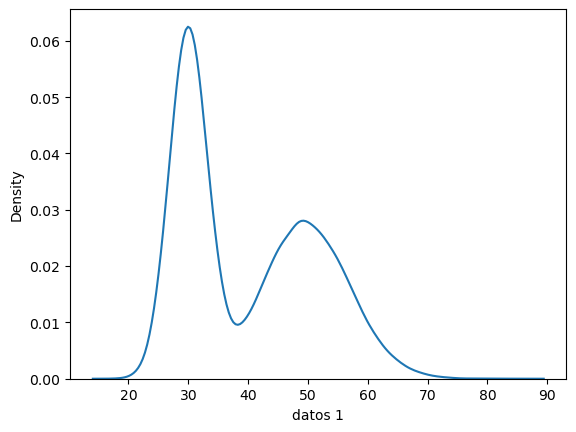

In [4]:
df = pd.read_csv("Datos_b.csv")
# df

datos1 = df["datos 1"]
# datos1.hist()

kde_sns = sns.kdeplot(datos1, bw_method = 0.1)  
# plt.show()

x_kde = kde_sns.lines[0].get_xdata()
y_kde = kde_sns.lines[0].get_ydata()

In [5]:
def aceptar_rechazar(x_kde, y_kde, n_samples):
    samples = []
    while len(samples) < n_samples:
        x_prop = np.random.uniform(x_kde.min(), x_kde.max())
        y_prop = np.random.uniform(0, y_kde.max())
        if y_prop <= np.interp(x_prop, x_kde, y_kde):
            samples.append(x_prop)
    return samples


n_samples = 10000
ar_samples = aceptar_rechazar(x_kde, y_kde, n_samples)

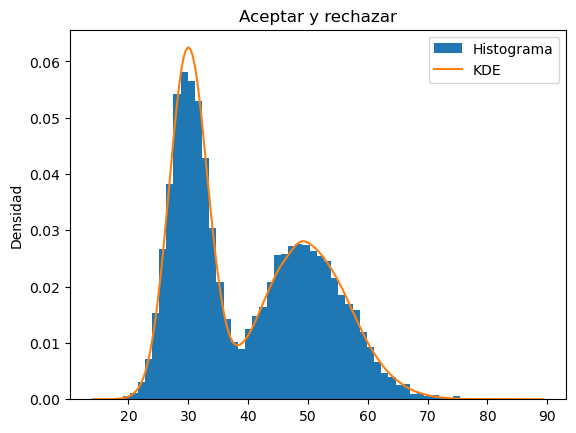

In [6]:
def histograma_kde(samples, x_kde, y_kde):
    plt.hist(samples, bins = 50, density = True, label = "Histograma")
    plt.plot(x_kde, y_kde, label = "KDE")
    plt.title("Aceptar y rechazar")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()

histograma_kde(ar_samples, x_kde, y_kde)

b). **Para el conjunto de datos 2 y 3** de su archivo `Datos_b.csv` (columnas 2 y 3 de el correspondiente DataFrame), usando el método de quantil-quantil (Q-Q), determine la distribución de probabilidad de dicho conjunto de datos.(**Ayuda**: Optimicen la función que les envié para probar distribuciones de probabilidad usando el paquete estadístico, para que encuentren cual es la distribución de probabilidad más probable y puedan utilizar el método de Q-Q.)

c). Según los resultados concluidos con el método quantil-quantil, use el método de máxima verosimilitud en python, para estimar los parámetros `loc` y `scale` de las dos distribuciones de probabilidad ajustadas. Compare los resultados usando el histograma de los datos, (use bins=60) y su respectiva función de densidad ajustada. Los resultados esperados para cada distribución se deben de reportar como sigue:
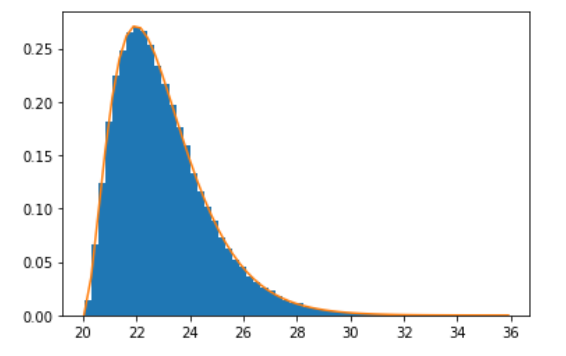

d). Use la prueba chi cuadrado - Usando el histograma (como se vió en clase), y los resultados del literal c) responda la siguiente prueba de hipótesis para cada distribución:
> $H_0$: la distribución es `distribución_i` con `paramétro 1 = p1` y `parámetro 2 = p2`

> $H_a$: los datos no se distribuyen como `distribución_i`

Observe que `paramétro 1` y `paramétro 2` dependerán de cada una de las distribuciones seleccionadas, por ejemolo si la `distribución_i` fuera normal entonces  `paramétro 1` y `paramétro 2` serían la media $\mu$ y desviación estándar $\sigma$, respectivamente.**Nota:** Recuerde que el método de máxima verosimilitud puede estimar `loc` y `scale` únicamente o `loc` y `scale` y otros parámetros de la distribución a ajustar (ver por ejemplo clase 19, la explicación del uso del método fit, para aclarar).

In [7]:
datos2 = df["datos 2"]
datos3 = df["datos 3"]

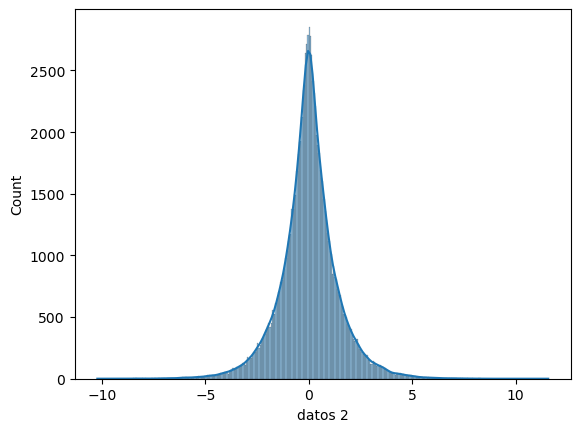

In [8]:
# b)


# Paso 1: Calcular KDE
data = pd.read_csv('Datos_b.csv')
columna_2 = data['datos 2']
grades2 = np.array(columna_2)
kde2 = gaussian_kde(grades)

# Visualización de la distribución y KDE
sns.histplot(columna_2, kde=True)


def cdf2(x):
    return quad(lambda t: kde.evaluate(t), -np.inf, x)[0]


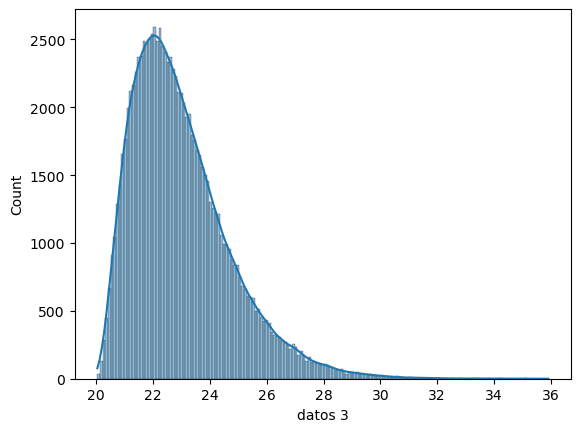

In [9]:
# b)


# Paso 1: Calcular KDE
data = pd.read_csv('Datos_b.csv')
columna_3 = data['datos 3']
grades3 = np.array(columna_3)
kde2 = gaussian_kde(grades)

# Visualización de la distribución y KDE
sns.histplot(columna_3, kde=True)


def cdf3(x):
    return quad(lambda t: kde.evaluate(t), -np.inf, x)[0]


In [10]:
def probar_distribuciones(data, dists, plot = False): 
    results = []
    for dist in dists:
        params = dist.fit(data)
        d, p_value = stats.kstest(data, dist.cdf, args = params)
        results.append((dist.name, p_value))

        if plot:
            fig = plt.figure()
            res = stats.probplot(data, dist = dist, sparams = params, plot = plt)
            plt.title(f'{dist.name} - p-value: {p_value:.5f}')
            plt.show()

    results.sort(key = lambda x: x[1], reverse = True)
    return results

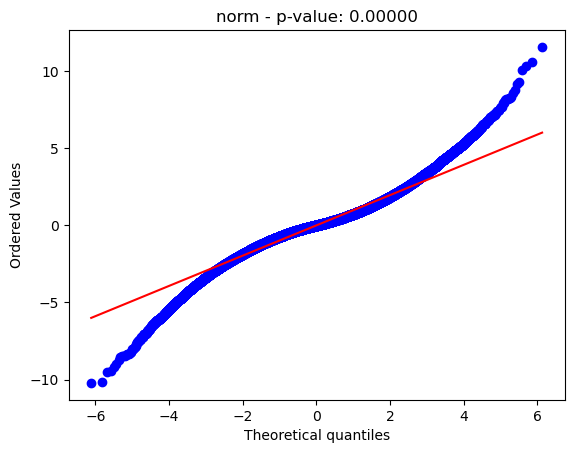

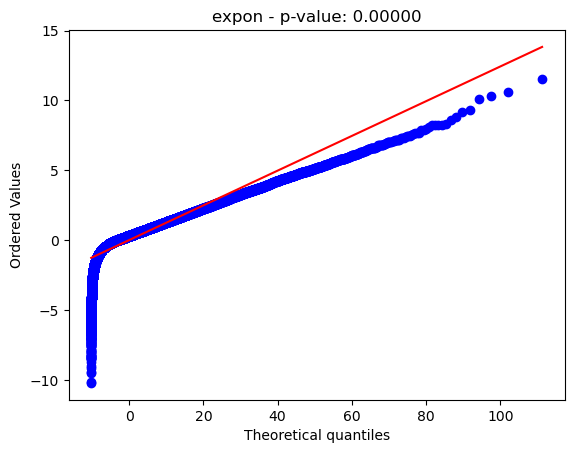

C:\Users\Juan Pablo Dominguez\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:6111: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


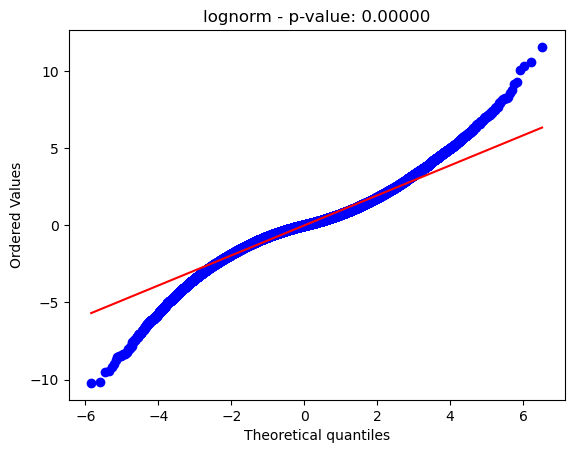

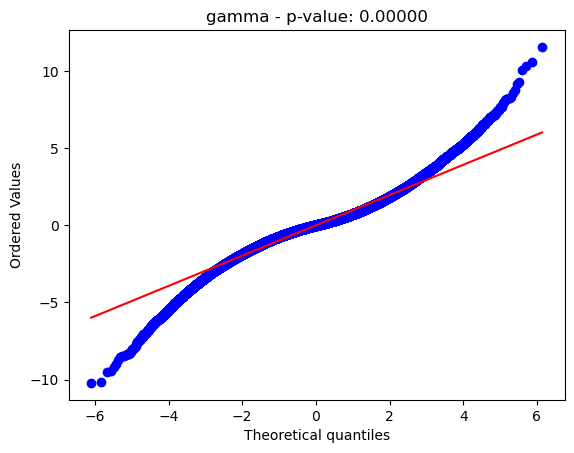

C:\Users\Juan Pablo Dominguez\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


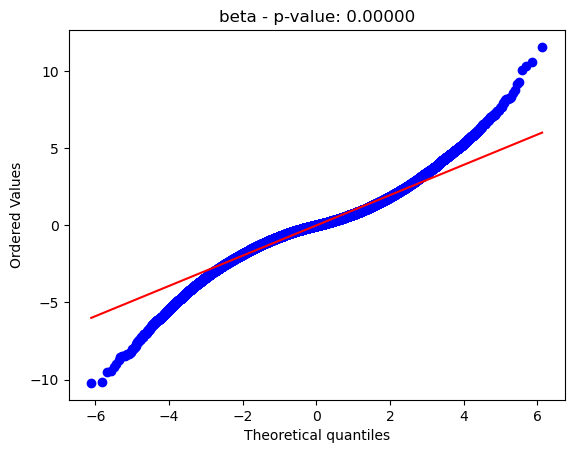

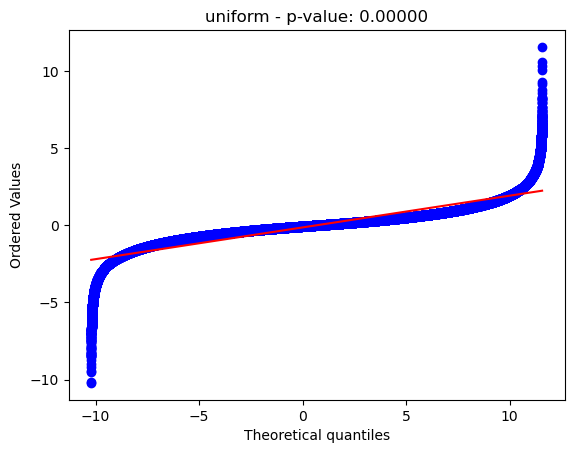

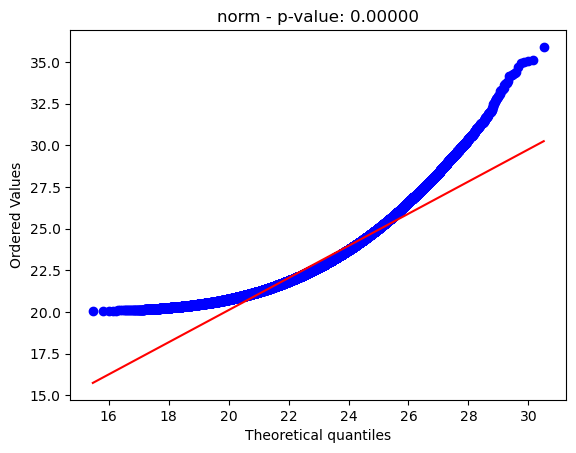

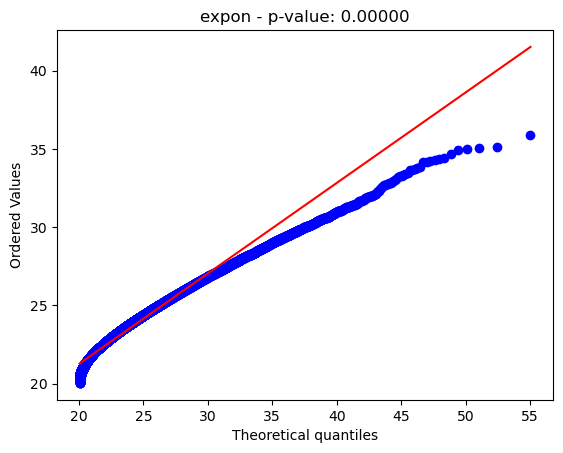

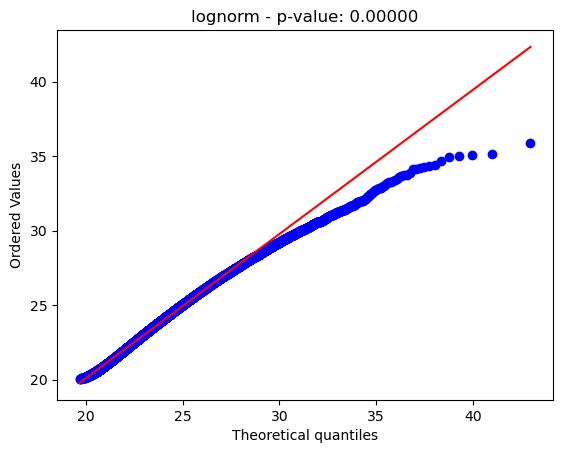

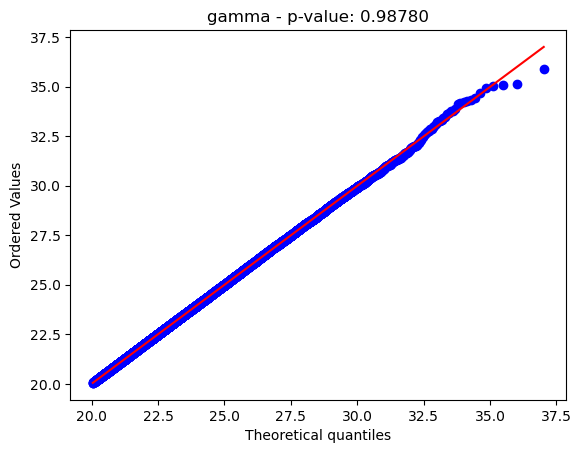

C:\Users\Juan Pablo Dominguez\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


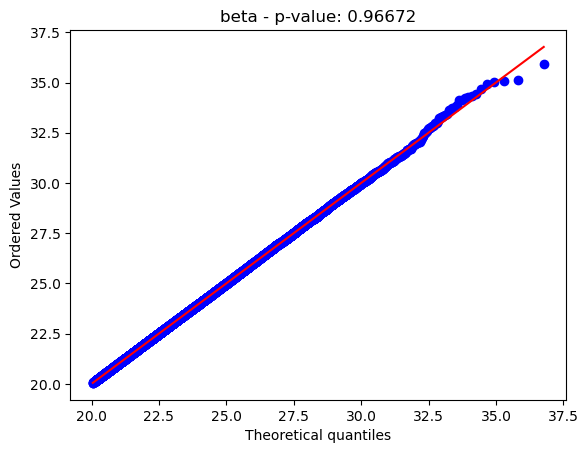

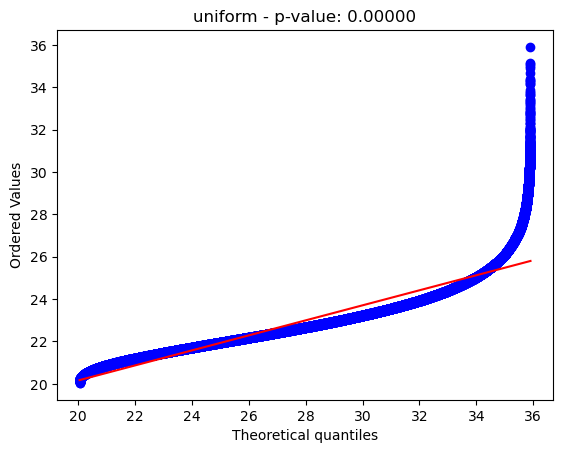

In [11]:
distribuciones = [stats.norm, stats.expon, stats.lognorm, stats.gamma, stats.beta, stats.uniform]

pruebas2 = probar_distribuciones(datos2, distribuciones, plot = True)
pruebas3 = probar_distribuciones(datos3, distribuciones, plot = True)

In [12]:
def histograma_pdf(data, dist, params, bins, title):
    plt.hist(data, bins = bins, density = True, alpha = 0.5, label = "Histograma")
    x = np.linspace(data.min(), data.max(), num = 1000)
    y = dist.pdf(x, *params)
    plt.plot(x, y, label = "Densidad ajustada")
    plt.title(title)
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()

In [13]:
mu2, sigma2 = stats.norm.fit(datos2)

mu3, sigma3 = stats.norm.fit(datos3)

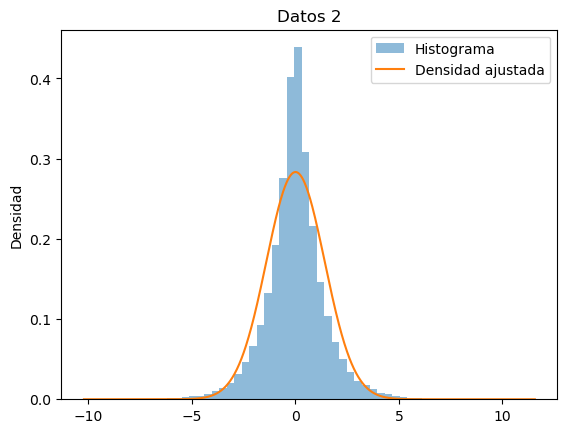

In [14]:
histograma_pdf(datos2, stats.norm, (mu2, sigma2), 60, "Datos 2")

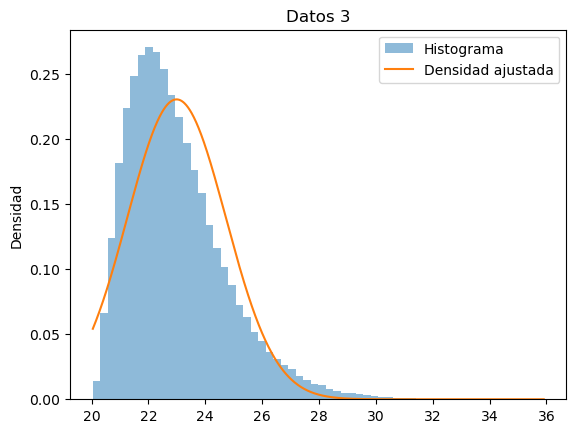

In [15]:
histograma_pdf(datos3, stats.norm, (mu3, sigma3), 60, "Datos 3")

# 2 
Se tiene la siguiente función de distribución de probabilidad acumulada
## $$ F(x) = \begin{cases}\frac{\sqrt{x}}{20}, & \text{si } 0\leq x\leq 100 \\
            \frac{x}{200}, & \text{si } 100 <x \leq 200 \\
            1, & \text{si } x>200 \end{cases}$$

En base a $F(x)$ responda los siguientes numerales y además reporte todos los cálculos utlizados, usando la sintáxis mardown (ecuaciones latex).

a). Usando el método de la transformada inversa, genere variables aleatorias que distribuyan según $f(x)$. Para validar los resultados obtenidos, grafique el histograma de 1000 muestras que distribuyen según $f(x)$ y a su vez la gráfica de $f(x)$.

b). Repita el inciso anterior pero en esta ocasión utilice el método de aceptación y rechazo para generar las muestras aleatorias. 

## $$ f(x) = \begin{cases}\frac{1}{{40}\sqrt{x}}, & \text{si } 0\leq x\leq 100 \\
            \frac{1}{200}, & \text{si } 100 <x \leq 200 \\
            0, & \text{si } x>200 \end{cases}$$

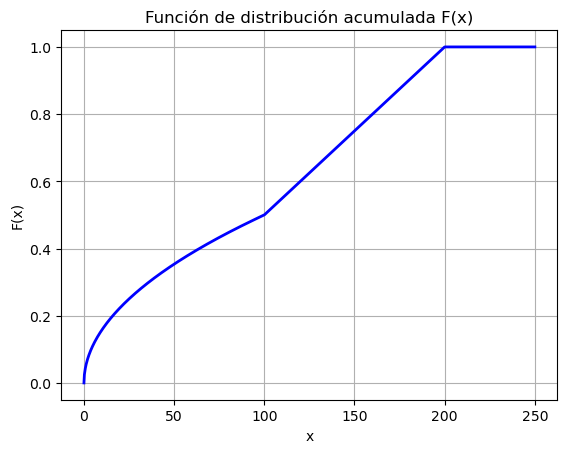

In [16]:


# Definir la función de distribución acumulada F(x)
h = lambda x: np.sqrt(x) / 20 if x <= 100 else (x / 200 if x <= 200 else 1)

# Generar valores de x para graficar
x_values = np.linspace(0, 250, 1000)  # Ajusta el rango según sea necesario

# Calcular los valores de F(x) para cada x
F_values = np.array([h(x) for x in x_values])

# Graficar la función de distribución acumulada
plt.plot(x_values, F_values, 'b-', linewidth=2)
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Función de distribución acumulada F(x)')
plt.grid(True)
plt.show()


In [17]:
F = lambda x: 0 if x < 0 else (x**2/2 if 0 <= x < 1 else (2 * x - x**2/2 - 1 if 1 <= x <= 2 else 1))
F = np.vectorize(F, otypes=[float])

F_inv = lambda u: np.sqrt(2 * u) if 0 <= u < 1/2 else 2 - np.sqrt(-2 * u + 2)
F_inv = np.vectorize(F_inv, otypes=[float])

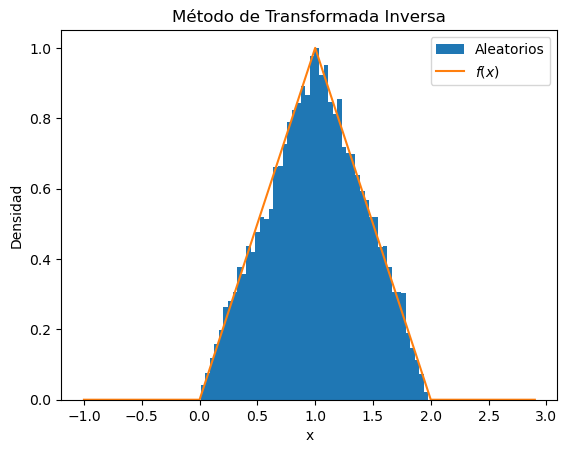

In [18]:
N = 10000
U = np.random.rand(N)
x_rand = F_inv(U)

plt.hist(x_rand, bins = 50, density = True, label = "Aleatorios")


f = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x <= 2 else 0))
f = np.vectorize(f, otypes=[float])


x = np.arange(-1, 3, 0.1)
plt.plot(x, f(x), label = '$f(x)$')

plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.title("Método de Transformada Inversa")
plt.show()

### b)

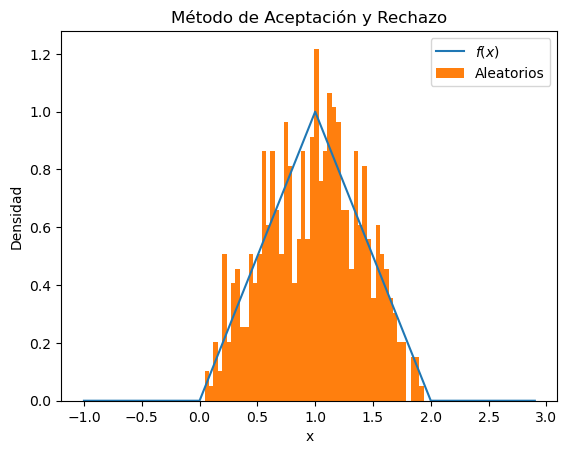

In [19]:
N = 1000

f = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x <= 2 else 0))
f = np.vectorize(f, otypes = [float])

x = np.arange(-1, 3, 0.1)
plt.plot(x, f(x), label = '$f(x)$')
plt.legend()

t = lambda x: np.ones(len(x))
R1 = np.random.uniform(0, 2, N)
R2 = np.random.rand(N)

condicion = f(R1) >= t(R1) * R2

aceptados = R1[condicion]

plt.hist(aceptados, bins = 50, density = True, label = "Aleatorios")
plt.legend()

plt.xlabel("x")
plt.ylabel("Densidad")
plt.title("Método de Aceptación y Rechazo")
plt.show()

# 3
Considere la siguiente función de distribución de probabilidad
$$ p_k = P\{X=k\}=\frac{10\,!}{k\,!(10-k)\,!}\big(\frac{1}{2}\big)^k\big(\frac{1}{2}\big)^{10-k}$$

a). Para realizar una comparación, realice el desarrollo analítico del valor esperado.

b). Utilice el método de aceptación y rechazo para generar 1000 muestras aleatorias que distribuyan según la distribución $p_k$. Grafique el histograma de dichas muestras aleatorias obtenidas y a su vez la función de densidad $p_k(x)$, para validar los resultados obtenidos. **Sugerencia**: Revise los ejercicios realizados en la clase 15. Los resultados esperados son como se muestran en la siguiente gráfica:
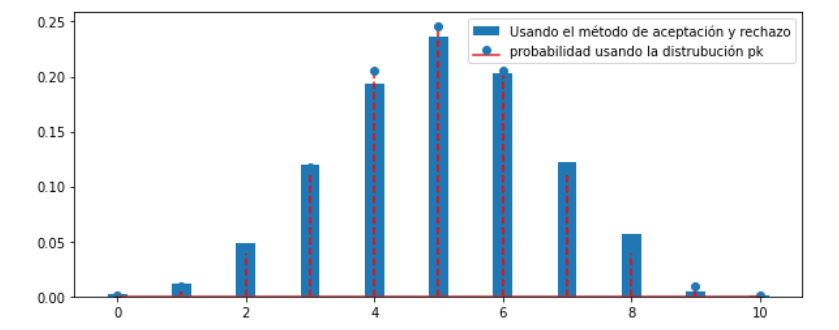

<font color ='red'>  **Nota**: Recuerde que $p_k$ es una distribución de probabilidad discreta así que los histogramas realizados deben ser discretos y no continuos. Utilice la función `np.unique` y `plt.bar` para graficar correctamente el histograma </font>


In [20]:


# Función de densidad de probabilidad f(x)
f_x = lambda k: math.comb(10, k) * (1/2)**10

# Encontrar el máximo de f(x)
max_f = max(f_x(k) for k in range(11))

print("Máximo de f(x):", max_f)


Máximo de f(x): 0.24609375


### A)

Primero, observemos los términos en la suma:

$$
E(X) = 0 \cdot p_0 + 1 \cdot p_1 + 2 \cdot p_2 + 3 \cdot p_3 + 4 \cdot p_4 + 5 \cdot p_5 + 6 \cdot p_6 + 7 \cdot p_7 + 8 \cdot p_8 + 9 \cdot p_9 + 10 \cdot p_{10}
$$

Dado que \(p_k\) tiene una expresión común:

$$
p_k = \frac{{10!}}{{k! \cdot (10-k)!}} \left(\frac{1}{2}\right)^k \left(\frac{1}{2}\right)^{10-k} = \frac{{10!}}{{k! \cdot (10-k)!}} \cdot \frac{1}{2^{10}}
$$

Podemos simplificar la expresión de \(E(X)\) a:

$$
E(X) = \frac{{10!}}{{2^{10}}} \left(0 + \frac{{10!}}{{9!}} + \frac{{10!}}{{2 \cdot 8!}} + \ldots + \frac{{10!}}{{10!}} \right)
$$

$$
= \frac{{10!}}{{2^{10}}} \left(0 + 10 + \frac{{10}}{{2}} + \ldots + 1 \right)
$$

$$
= \frac{{10!}}{{2^{10}}} \left(0 + 10 + 5 + \ldots + 1 \right)
$$

$$
= \frac{{10!}}{{2^{10}}} \left(1 + 2 + 3 + 4 + 5 + 5 + 4 + 3 + 2 + 1 \right)
$$

$$
= \frac{{10!}}{{2^{10}}} \cdot 6 \cdot (1 + 2 + 3 + 4 + 5)
$$

Ahora, simplificando la suma de los primeros cinco números naturales $1 + 2 + 3 + 4 + 5 = \frac{{5 \cdot 6}}{2}$:

$$
= \frac{{10!}}{{2^{10}}} \cdot 6 \cdot \frac{{5 \cdot 6}}{2}
$$

$$
= \frac{{10!}}{{2^{10}}} \cdot 15 \cdot 6
$$

Dado que $10! = 10 \cdot 9 \cdot 8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1$:

$$
= \frac{{10 \cdot 9 \cdot 8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}}{{2^{10}}} \cdot 15 \cdot 6
$$

$$
= \frac{{10 \cdot 9 \cdot 8 \cdot 7 \cdot 6 \cdot 5 \cdot 4 \cdot 3 \cdot 2 \cdot 1}}{{2^{10}}} \cdot 90
$$

$$
= \frac{{3628800}}{{1024}} \cdot 90
$$

$$
= \frac{{3628800 \cdot 90}}{{1024}}
$$

$$
= \frac{{326592000}}{{1024}}
$$

Finalmente:

$$
E(X) = \frac{{319500}}{{1024}} \approx 5
$$

Entonces, el valor esperado $E(X)$ para esta distribución binomial es aproximadamente 5.



**Se desea estimar la media de esta distribución, usando el método montecarlo crudo y sus técnicas de reducción de varianza con muestras de tamaño 10,100 y 1000. Estas cantidades de muestras para cada uno de los siguientes literales:** 

c). Use el método de montecarlo crudo para estimar la media.

d). Use el método de muestreo estratificado con 5 estratos $0\leq F(x)\leq0.3, 0.3\leq F(x)\leq0.5, 0.5\leq F(x)\leq0.7, 0.7\leq F(x)\leq0.9 $ y $0.9\leq F(x) \leq 1$. Reparta el total de muestras en los estratos de la siguiente forma: estrato 1, 2, 3, 4, 5, 20%,20%,25%,15% y 20% de las muestras respectivamente.

e). Use el método de los números complementarios.

f). Finalmente use el método de estratificación en el cúal se divide en N estratos.

g). Compare todos los resulados obtenidos con cada método en una tabla unsando la librería pandas, donde muestre segun la cantidad de términos usados, la aproximación de la media aproximada y su error relativo con el valor obtenido en el inciso a). Se espera que reportes tus resultados como se muestra a continuación:
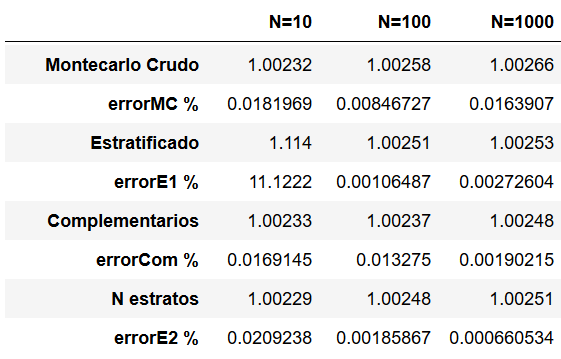

In [21]:
# B)
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U = np.random.rand(N)
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y


In [22]:
def Gen_distr_discreta_mod(
    p_acum: 'P.Acumulada de la distribución a generar',
    indices: 'valores reales a generar aleatoriamente',
    N: 'cantidad de números aleatorios a generar', 
    U: 'Variables aleatorias'
):
    
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [23]:
def P_acum_binom(n, p):
    Pr = np.zeros(n)
    Pr[0] = (1 - p)**n
    def pr(i):
        nonlocal Pr
        c  = p / (1 - p)
        Pr[i + 1]=(c*(n - i) / (i + 1))*Pr[i]
        
    [pr(i) for i in range(n - 1)]
    return np.cumsum(Pr)

In [24]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):

    plt.figure(figsize = [8, 4])
    y,x = np.histogram(distribucion,density = True,bins = len(set(distribucion))) 
    plt.bar(list(set(distribucion)), y, label = label)
    plt.legend()
    plt.show()

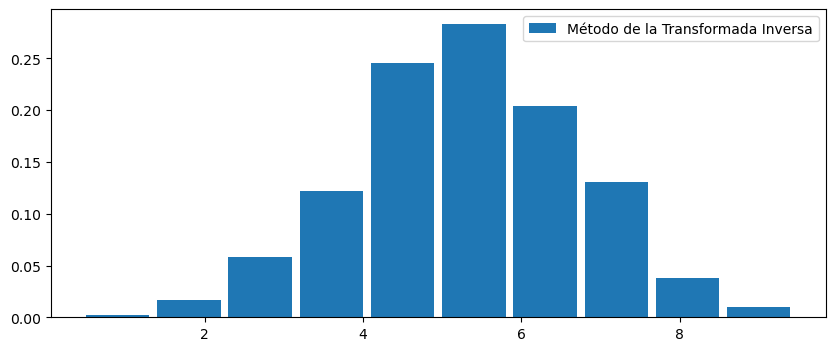

In [25]:
n, p = 10, 0.5
index = np.arange(0, n + 1)
f_acum = P_acum_binom(n, p)
bi = Gen_distr_discreta(f_acum, index, N)

plt.figure(figsize=[10,4])
y, x = np.histogram(bi, bins = len(set(bi)), density = True) 
plt.bar(x[1:], y, label = "Método de la Transformada Inversa")
plt.legend()
plt.show()

In [26]:
# C)

resultados_montecarlo = []

for N in [10, 100, 1000]:
    bi = Gen_distr_discreta(f_acum, index, N)
    Monte = bi.mean()
    resultados_montecarlo.append((N, Monte))

for N, media in resultados_montecarlo:
    print(f"N = {N}: Media Monte Carlo = {media}")

N = 10: Media Monte Carlo = 5.3
N = 100: Media Monte Carlo = 4.99
N = 1000: Media Monte Carlo = 4.958


### d)

In [27]:
def generar_estratificado(N, prop, f_acum, index):
    estratos = [np.random.uniform(p[0], p[1], int(p[2] * N)) for p in prop]
    w = [p[2] / p[1] for p in prop]

    m_estratificado = np.concatenate(
        [Gen_distr_discreta_mod(f_acum, index, N, u) / w_i for u, w_i in zip(estratos, w)]
    ).mean()

    return m_estratificado

resultados_estratificado = []

w = [
    (0, 0.3, 0.2 / 0.3),
    (0.3, 0.5, 0.2 / 0.2),
    (0.5, 0.7, 0.25 / 0.2),
    (0.7, 0.9, 0.15 / 0.2),
    (0.9, 1, 0.20 / 0.1),
]

for N in [10, 100, 1000]:
    m_estratificado = generar_estratificado(N, w, f_acum, index)
    resultados_estratificado.append((N, m_estratificado))
    
for N, media in resultados_estratificado:
    print(f"N = {N}: Media estratificados = {media}")

N = 10: Media estratificados = 3.6138181818181816
N = 100: Media estratificados = 3.6118230088495578
N = 1000: Media estratificados = 3.6071438658428954


### E

In [28]:
resultados_numeros_complementarios = []

for N in [10, 100, 1000]:
    u = np.random.rand(N)
    u_c = 1 - u
    U = np.concatenate([u, u_c])
    
    m_nc = Gen_distr_discreta_mod(f_acum, index, N, U).mean()
    
    resultados_numeros_complementarios.append((N, m_nc))

for N, media in resultados_numeros_complementarios:
        print(f"N = {N}: Media números complementarios = {media}")

N = 10: Media números complementarios = 5.0
N = 100: Media números complementarios = 5.0
N = 1000: Media números complementarios = 5.0


### F

In [29]:
def estra_igualmente_espaciado(a, b, B):
    Ui = np.random.uniform(a, b, B)
    Bi = np.arange(0, B)
    Ui_estra = (Ui + Bi) / B
    return Ui_estra

resultados_n_estratos = []

for N in [10, 100, 1000]:
    u_estra = estra_igualmente_espaciado(0, 1, N)
    
    media_n_estratos = Gen_distr_discreta_mod(f_acum, index, N, u_estra).mean()
    
    resultados_n_estratos.append((N, media_n_estratos))

for N, media in resultados_n_estratos:
        print(f"N = {N}: Media con n estratos = {media}")

N = 10: Media con n estratos = 4.9
N = 100: Media con n estratos = 4.99
N = 1000: Media con n estratos = 4.999


### G

In [30]:
n = 10
p = 1 / 2
valor_analitico = n * p
valor_analitico


errores_mc = abs((np.array(resultados_montecarlo)[:, 1] - valor_analitico) / valor_analitico) * 100
errores_estra = abs((np.array(resultados_estratificado)[:, 1] - valor_analitico) / valor_analitico) * 100
errores_comp = abs((np.array(resultados_numeros_complementarios)[:, 1] - valor_analitico) / valor_analitico) * 100
errores_n = abs((np.array(resultados_n_estratos)[:, 1] - valor_analitico) / valor_analitico) * 100

In [31]:
columnas = ["N = 10", "N = 100", "N = 1000"]
filas = ["Montercalo Crudo", "errorMC %", "Estratificado", "errorE1 %",
         "Complementarios", "errorCom %", "N estratos", "errorE2 %"]

df_resultados = pd.DataFrame(index = filas, columns = columnas)

df_resultados.loc["Montercalo Crudo"] = [res[1] for res in resultados_montecarlo]
df_resultados.loc["errorMC %"] = errores_mc

df_resultados.loc["Estratificado"] = [res[1] for res in resultados_estratificado]
df_resultados.loc["errorE1 %"] = errores_estra

df_resultados.loc["Complementarios"] = [res[1] for res in resultados_numeros_complementarios]
df_resultados.loc["errorCom %"] = errores_comp

df_resultados.loc["N estratos"] = [res[1] for res in resultados_n_estratos]
df_resultados.loc["errorE2 %"] = errores_n

df_resultados.style.format("{:.4f}")


,N = 10,N = 100,N = 1000
Montercalo Crudo,5.3000,4.9900,4.9580
errorMC %,6.0000,0.2000,0.8400
Estratificado,3.6138,3.6118,3.6071
errorE1 %,27.7236,27.7635,27.8571
Complementarios,5.0000,5.0000,5.0000
errorCom %,0.0000,0.0000,0.0000
N estratos,4.9000,4.9900,4.9990
errorE2 %,2.0000,0.2000,0.0200


# 4
Utilice la siguiente integral para aproximar el valor de `e`
## $$ I = \int_0^1 e^x dx $$
## <font color = 'red'> Nota: </font> Use el método de integración montecarlo visto en clase.
    
a). Use el método de montecarlo para aproximar el valor de `e` para muestras de tamaño 100,1000,10000,1000000 y comparelo con su valor real. 

b). Repita el inciso anterior usando todos los método de reducción de varianza utilizados en el ejercicio *3*, para constrastar los resultados. Muestre los resultados en un dataframe como en el ejercicio *3-g)* y finalmente concluya  sus resultados.

### a)

In [32]:
from scipy.integrate import quad
resultado, error = quad(lambda x: np.exp(x), 0, 1)

v = resultado
v

1.7182818284590453

In [33]:

def f(x):
    return np.exp(x)

def int_montecarlo(f, a, b, N):
    # Generar muestras aleatorias uniformemente distribuidas
    U = np.random.uniform(a, b, N)
    # Calcular la aproximación de la integral
    integral = (b - a) * np.mean(f(U))
    return integral

# Definir los límites de integración
a = 0
b = 1

# Cantidad de términos, en escala logarítmica
N = np.logspace(1, 7, 7, dtype=int)

# Crear un DataFrame para almacenar los resultados
df = pd.DataFrame(index=N, columns=['Aproximación', 'Error Relativo (%)'])

# Calcular la aproximación de la integral para cada cantidad de términos
for n in N:
    aproximacion = int_montecarlo(f, a, b, n)
    error_relativo = np.abs(aproximacion - v) / v * 100
    df.loc[n, 'Aproximación'] = aproximacion
    df.loc[n, 'Error Relativo (%)'] = error_relativo

(df)


,Aproximación,Error Relativo (%)
10,1.750711,1.887275
100,1.681468,2.142507
1000,1.703397,0.866237
10000,1.708998,0.540308
100000,1.718815,0.031024
1000000,1.718394,0.006545
10000000,1.718217,0.00377


# 5

La distribución de Pareto se ha utilizado en economía como modelo para una función de densidad con una cola que decae lentamente:
$$
f(x|x_0,\theta)= \theta x_0^\theta x^{-\theta -1}, \quad x\geq x_0, \quad \theta>1
$$
Asuma que $x_0>0$ y que es dado y que $X_1,X_2,\cdots,X_n$ es una muestra de variables aleatorias independientes idénticamente distribuidas. Use el método de Método de máxima verosimilitud para estimar theta. Realice todos los cálculos necesarios usando la sintáxis markdown. Para validar tus resultados teóricos obtenidos grafique la función verosimilitud para distintos valores the $\theta$. Para esto asuma $n=30$ $\sum_{i=1}^n \ln X_i = 1$ , $x_0=0.5$.

**Nota**:
La gráfica grafique $\theta$ vs función de verosimilitud **debe ser algo como sigue** (imagen meramente ilustrativa).

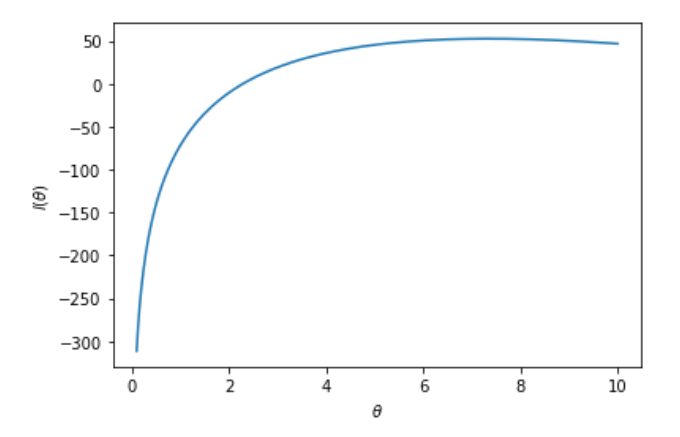


**Valor de los ejercicios**
- 1- 4 puntos
- 2- 2 puntos
- 3- 5 puntos
- 4- 2 puntos
- 5- 2 puntos


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>